In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
%mathplotlib qt

UsageError: Line magic function `%mathplotlib` not found.


In [2]:
'''importing Data'''
import json
data = None
with open('B0005.json', 'r') as jsonfile:
    data = json.load(jsonfile)

In [3]:
'''Extracting Data'''
counter = 0
ds_raw = []
for key, value in data.items():
    ds_raw.append(value['voltage_battery'])
print(len(ds_raw))

168


In [4]:
'''Extracting Data'''
padding = 0
stride = 1
window = 40
predict_window = 5
ls = []
ls_label = []
for i in ds_raw:
    r = [0 for i in range(padding)]
    for j in i:
        r.append(j)
    for j in range(padding):
        r.append(0)
    for j in range(0, len(r) - (window + predict_window), 1):
        ls.append(r[j:j+window])
        ls_label.append(r[j+window:j+window+predict_window])
X = np.asarray(ls)
y = np.asarray(ls_label)
X = X.reshape((X.shape[0], 1, X.shape[1]))
X.shape
y.shape

(42725, 5)

In [5]:
'''Choose train,Validation and Predict Data'''
train = int(0.7 * X.shape[0])
print(train)
validation = int(0.1 * X.shape[0])
X_train = X[:train,:,:]
y_train = y[:train,:]
X_validation = X[train:train+validation,:,:]
y_validation = y[train:train+validation,:]
X_test = X[train+validation:, :, :]
y_test = y[train+validation:, :]
print(f'train:{X_train.shape}')
print(f'validation:{X_validation.shape}')
print(f'test:{X_test.shape}')
print(f'train:{y_train.shape}')
print(f'validation:{y_validation.shape}')
print(f'test:{y_test.shape}')


29907
train:(29907, 1, 40)
validation:(4272, 1, 40)
test:(8546, 1, 40)
train:(29907, 5)
validation:(4272, 5)
test:(8546, 5)


In [6]:
'''Simple RNN'''
epochs = 20
batch_size = 20
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(window, input_shape=(1, window)),
    tf.keras.layers.Dense(units=predict_window)
])
model.build()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 40)                3240      
                                                                 
 dense (Dense)               (None, 5)                 205       
                                                                 
Total params: 3,445
Trainable params: 3,445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1496/1496 [==============================] - 4s 2ms/step - loss: 0.1861
Epoch 2/20
1496/1496 [==============================] - 3s 2ms/step - loss: 0.0138
Epoch 3/20
1496/1496 [==============================] - 3s 2ms/step - loss: 0.0082
Epoch 4/20
1496/1496 [==============================] - 3s 2ms/step - loss: 0.0066
Epoch 5/20
1496/1496 [==============================] - 5s 3ms/step - loss: 0.0061
Epoch 6/20
1496/1496 [=============

In [7]:
'''Predict Data'''
y_predict = model(X_test)

In [9]:
'''MSE'''
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, y_predict).numpy()
print(f"mean square error: {error}")

mean square error: 0.005206502042710781


In [10]:
'''Comparing y_predict and Real y'''
print(y_predict[312])
print(y_test[312])

tf.Tensor([3.3742113 3.3537726 3.4453995 3.3902307 3.448386 ], shape=(5,), dtype=float32)
[3.38746062 3.40185039 3.41519102 3.42710758 3.43837592]


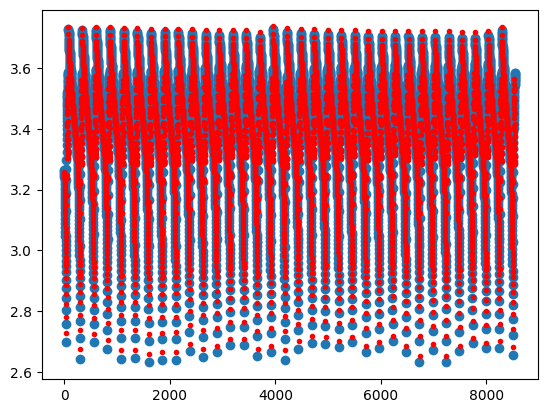

In [8]:
'''Plot'''
plt.figure()
x_axis = [i for i in range(len(y_test))]
y_axis = y_test[:, 3]
y_axis_predict = y_predict[:, 3]
plt.plot(x_axis, y_axis_predict, '.r')
plt.scatter(x_axis, y_axis)
plt.show()

In [12]:
'''LTSM'''
epochs = 20
batch_size = 20
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(window, input_shape=(1, window)),
    tf.keras.layers.Dense(units=predict_window)
])
model.build()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
y_predict = model(X_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                12960     
                                                                 
 dense_1 (Dense)             (None, 5)                 205       
                                                                 
Total params: 13,165
Trainable params: 13,165
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1496/1496 [==============================] - 10s 5ms/step - loss: 0.2064
Epoch 2/20
1496/1496 [==============================] - 9s 6ms/step - loss: 0.0089
Epoch 3/20
1496/1496 [==============================] - 10s 7ms/step - loss: 0.0062
Epoch 4/20
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0053
Epoch 5/20
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0050
Epoch 6/20
1496/1496 [=======

mean square error: 0.0048529114574193954
tf.Tensor([3.3484535 3.3869505 3.3957548 3.3990893 3.4020061], shape=(5,), dtype=float32)
[3.38746062 3.40185039 3.41519102 3.42710758 3.43837592]


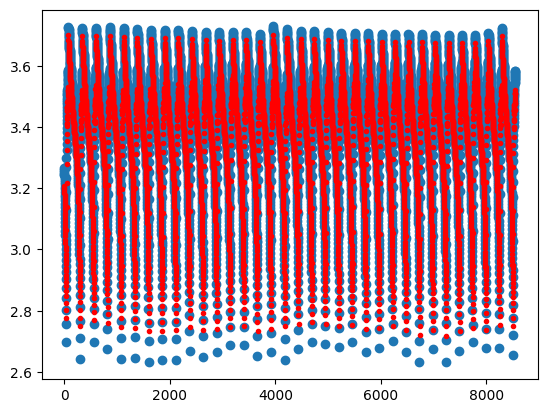

In [13]:
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, y_predict).numpy()
print(f"mean square error: {error}")
print(y_predict[312])
print(y_test[312])

x_axis = [i for i in range(len(y_test))]
y_axis = y_test[:, 3]
y_axis_predict = y_predict[:, 3]
plt.plot(x_axis, y_axis_predict, '.r')
plt.scatter(x_axis, y_axis)
plt.show()

In [9]:
epochs = 20
batch_size = 20
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(window, input_shape=(1, window)),
    tf.keras.layers.Dense(units=predict_window)
])
model.build()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
y_predict = model(X_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 40)                9840      
                                                                 
 dense_1 (Dense)             (None, 5)                 205       
                                                                 
Total params: 10,045
Trainable params: 10,045
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1496/1496 [==============================] - 7s 3ms/step - loss: 0.1029
Epoch 2/20
1496/1496 [==============================] - 4s 3ms/step - loss: 0.0075
Epoch 3/20
1496/1496 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 4/20
1496/1496 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 5/20
1496/1496 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 6/20
1496/1496 [=========

mean square error: 0.0025722915306687355
tf.Tensor([3.4192462 3.4232025 3.4360676 3.4593906 3.449388 ], shape=(5,), dtype=float32)
[3.38746062 3.40185039 3.41519102 3.42710758 3.43837592]


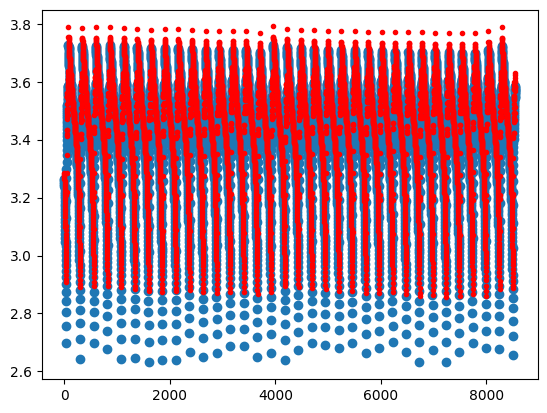

In [10]:
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, y_predict).numpy()
print(f"mean square error: {error}")
print(y_predict[312])
print(y_test[312])

x_axis = [i for i in range(len(y_test))]
y_axis = y_test[:, 3]
y_axis_predict = y_predict[:, 3]
plt.plot(x_axis, y_axis_predict, '.r')
plt.scatter(x_axis, y_axis)
plt.show()